## Final Project Submission

Please fill out:
* Student name: PAUL NJOROGE MUNIU
* Student pace: self paced / part time / full time : FULL TIME
* Scheduled project review date/time: MARCH 2024
* Instructor name: MARYANN MWIKALI
* Blog post URL:


# **ANALYZING BOX OFFICE DATA FOR NEW MICROSOFT'S MOVIE STUDIO.**

## **1. BUSINESS UNDERSTANDING.**



### 1.1 BUSINESS PROBLEM
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## **2. DATA UNDERSTANDING.**
As Microsoft ventures into the filmmaking industry, it faces the challenge of lacking its own dataset to inform its decisions. Instead, we are leveraging data collected from diverse sources to gain insights. These datasets contain valuable information such as movie ratings, basic movie details linked to unique movie IDs, domestic and foreign gross revenue figures, movie budgets, genre classifications e.t.c. By analyzing this comprehensive dataset, we aim to uncover trends, patterns, and correlations that can guide Microsoft's strategy in producing successful films. Our exploration of this data will empower Microsoft to make informed decisions and maximize its potential in the dynamic and competitive film industry landscape.

## **3. DATA PREPARATION.**
I'll be transforming data into usable format from this point on.
The majority of the information I used for this project came from a zipped folder that contained materials provided by the school. Since they have different file formats, they were all compressed into one folder.ite.w:w:

The Datasetsprovided for this project are listed below:

+ [Box Office Mojo.](https://www.boxofficemojo.com)
+ [IMDB.](https://www.imdb.com)
+ [Rotten Tomatoes.](https://www.rottentomatoes.com)
+ [The Movie DB.](https://www.themoviedb.org)
+ [The Numbers.](https://www.the-numbers.com)

To make Microsoft Film Studio successful, we will need to comprehend the datasets at our disposal. Four of the datasets were utilized for this project.

### **3.1 DATA LOADING**
To begin our analysis, we start by importing the necessary libraries and loading the dataset into our environment. We will utilize Python's pandas library to handle our data effectively.

In [1]:
#importing the necessary libraries.
import pandas as pd
import csv
import json
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import sqlite3
import seaborn as sns

%matplotlib inline

#### **(a) Box Office Mojo**

In [2]:
#loading Box Office Mojo Movie file
box_office_mojo = pd.read_csv("zippedData/bom.movie_gross.csv/bom.movie_gross.csv")
box_office_mojo

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# lets get more information about the data set 
# using The info() method in pandas DataFrame  
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# plus the shape
box_office_mojo.shape

(3387, 5)

#### **(b) The Numbers.**

In [5]:
# loading The numbers file
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv')
the_numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
# lets get more information about the data set 
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
# The shape
the_numbers.shape

(5782, 6)

#### **(c) The Movie DB.**

In [8]:
# Loading the Movie DB File
the_movie_db = pd.read_csv("zippeddata/tmdb.movies.csv/tmdb.movies.csv")
the_movie_db

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [9]:
# More infor. about the dataset
the_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [10]:
# it's shape
the_movie_db.shape

(26517, 10)

#### **(d) IMDB DataBase**
Establishing a connection to the SQLite database im.db

In [11]:
conn = sqlite3.connect("zippedData\im.db\im.db")
conn

Lets retrieves information about the schema of the IMDb database and displays it in a DataFrame named imdb_schema.

In [12]:
# Querying the SQLite master table to retrieve information about the database schema
# and storing the results in a DataFrame named 'imdb_schema'
imdb_schema = pd.read_sql("""
SELECT *
FROM sqlite_master
""", conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


The `movie_basics` and `movie_ratings` tables are the most relevant datasets for our analysis from the `IMDB` DataBase.

In [13]:
# Querying movie_basics table
movie_basics_df = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [14]:
# Querying movie_ratings table
movie_ratings_df = pd.read_sql("""
SELECT * 
FROM movie_ratings
""", conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


#### **MERGING THE TWO TABLES**
After examining the data from these two tables, the next step is to enrich the `movie_basics` table by merging the `averagerating` and `numvotes` columns from the `movie_ratings` table. This addition provides crucial insights into how the movies are being perceived by audiences, allowing us to better understand their reception and popularity.


In [15]:
#Merging movie_basics to movie_ratings
merged_imdb = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')
merged_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [16]:
# clossing the connection 
#Closing the connection helps free up system resources and ensures that there are no lingering connections to the database.
conn.close()


### **3.2 DATA CLEANING**
In this section, we will perform data cleaning to ensure that our dataset is in a suitable format for analysis. Data cleaning involves identifying and correcting errors or inconsistencies in the dataset, handling missing values, removing duplicates, and transforming data into a more usable format.


#### (a) Box office Movie.

In [17]:
#starting data cleaning from the first dataset
box_office_mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [19]:
#checking for any null values to clean 
box_office_mojo.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
# Checking for any duplicates
box_office_mojo.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [21]:
# Drop rows with missing values in the 'studio' column
box_office_mojo.dropna(subset=['studio'], inplace=True)

# Filling missing values in the 'domestic_gross' column with the median
# Calculating the median excluding NaN and non-finite values  
# providing a more accurate representation of the data
median_domestic_gross = np.nanmedian(box_office_mojo['domestic_gross'])
box_office_mojo['domestic_gross'].fillna(median_domestic_gross, inplace=True)

# Filling missing values in the 'foreign_gross' column with 0 and converting it to numeric
box_office_mojo['foreign_gross'] = pd.to_numeric(box_office_mojo['foreign_gross'], errors='coerce').fillna(0)

# convert domestic_gross float to integer type
box_office_mojo['domestic_gross'] = box_office_mojo['domestic_gross'].astype(int)

#convert foreign_gross float to integer type
box_office_mojo['foreign_gross'] = box_office_mojo['foreign_gross'].astype(int)


**Counter-checking the clean data**

In [22]:
box_office_mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


In [23]:
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3382 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3382 non-null   int32 
 3   foreign_gross   3382 non-null   int32 
 4   year            3382 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 132.1+ KB


In [24]:
box_office_mojo.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### (b) The Numbers.

In [25]:
# Next we are on to the Numbers file
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
# Checking for any null values to clean
the_numbers.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [28]:
# Checking for any duplicates
the_numbers.duplicated().value_counts()

False    5782
Name: count, dtype: int64

In [29]:
# Converting the release date to date time
the_numbers['release_date'] = pd.to_datetime(the_numbers['release_date'])

#Removing the "$" and "," in production budget, domestic gross, and worldwide gross columns
# Production budget
the_numbers["production_budget"] = the_numbers["production_budget"].str.replace('$', '')
the_numbers["production_budget"] = the_numbers["production_budget"].str.replace(',', '')

# Domestic gross
the_numbers["domestic_gross"] = the_numbers["domestic_gross"].str.replace('$', '')
the_numbers["domestic_gross"] = the_numbers["domestic_gross"].str.replace(',', '')

#Worldwide gross
the_numbers["worldwide_gross"] = the_numbers["worldwide_gross"].str.replace('$', '')
the_numbers["worldwide_gross"] = the_numbers["worldwide_gross"].str.replace(',', '')
# Display the numbers without scientific notation
pd.options.display.float_format = '{:,.2f}'.format

#Converting the production_budget to Float
the_numbers["production_budget"] = the_numbers["production_budget"].astype(float)

#Converting the domestic_gross to Integer
the_numbers["domestic_gross"] = the_numbers["domestic_gross"].astype(float)

#Converting the worldwide_gross to Integer
the_numbers["worldwide_gross"] = the_numbers["worldwide_gross"].astype(float)

# Renaming "Movie" column to "title"
the_numbers.rename(columns={"movie":"title"}, inplace=True)


**Counter-checking the clean data**

In [30]:
the_numbers.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00"
2,3,2019-06-07,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00"


In [31]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [32]:
the_numbers.isna().sum()

id                   0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### (c) The Movie DB.

In [33]:
# Calling the next datasetc, The Movie DB.
the_movie_db.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [34]:
the_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [35]:
the_movie_db.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [36]:
# Checking for any duplicates
the_movie_db.duplicated().value_counts()

False    26517
Name: count, dtype: int64

In [37]:
# Converting the Release date to datetime
the_movie_db["release_date"] = pd.to_datetime(the_movie_db["release_date"])

**Counter-checking the clean data**

In [38]:
the_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [39]:
the_movie_db.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


#### **(d) Merged_imdb**
Lastly we check the merged_imdb if it requires any cleaning.

In [40]:
#lets call it back 
merged_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119


In [41]:
merged_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [42]:
merged_imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [43]:
# Checking for any duplicates
merged_imdb.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [44]:
# Renaming 'original_title'  column to title
merged_imdb.rename(columns={'primary_title':'title'}, inplace=True)

In [45]:
# Dropping rows with missing genre values 
merged_imdb.dropna(subset=["genres"], inplace =True)

# Converting runtime_minutes column to numeric
merged_imdb['runtime_minutes'] = pd.to_numeric(merged_imdb['runtime_minutes'], errors='coerce')

# For the "runtime_minutes" column, 
# We're Inputing missing values with the median runtime.
median_runtime = merged_imdb["runtime_minutes"].median()
merged_imdb["runtime_minutes"].fillna(median_runtime, inplace=True)

**Counter-checking the clean data**

In [46]:
merged_imdb.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.00,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119


In [47]:
merged_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   title            73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [48]:
merged_imdb.isnull().sum()

movie_id           0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### **3.2 DATA ANALYSIS**
In this section of the project, i'll be conducting data analysis by merging multiple datasets into one cohesive dataset. The merged dataset will then be used for further exploration and analysis.


In [49]:
merged_data12 = pd.merge(box_office_mojo, the_numbers, on = 'title', how = 'inner')
merged_data12.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000,652000000,2010,47,2010-06-18,"200,000,000.00","415,004,880.00","1,068,879,522.00"
1,Inception,WB,292600000,535700000,2010,38,2010-07-16,"160,000,000.00","292,576,195.00","835,524,642.00"
2,Shrek Forever After,P/DW,238700000,513900000,2010,27,2010-05-21,"165,000,000.00","238,736,787.00","756,244,673.00"
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,53,2010-06-30,"68,000,000.00","300,531,751.00","706,102,828.00"
4,Iron Man 2,Par.,312400000,311500000,2010,15,2010-05-07,"170,000,000.00","312,433,331.00","621,156,389.00"


In [50]:
merged_data123 = pd.merge(merged_data12, the_movie_db, on = 'title', how = 'inner')
merged_data123.head()

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross_y,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,Toy Story 3,BV,415000000,652000000,2010,47,2010-06-18,"200,000,000.00","415,004,880.00","1,068,879,522.00",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,7.70,8340
1,Inception,WB,292600000,535700000,2010,38,2010-07-16,"160,000,000.00","292,576,195.00","835,524,642.00",4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,8.30,22186
2,Shrek Forever After,P/DW,238700000,513900000,2010,27,2010-05-21,"165,000,000.00","238,736,787.00","756,244,673.00",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.04,2010-05-16,6.10,3843
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,53,2010-06-30,"68,000,000.00","300,531,751.00","706,102,828.00",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.34,2010-06-23,6.00,4909
4,Iron Man 2,Par.,312400000,311500000,2010,15,2010-05-07,"170,000,000.00","312,433,331.00","621,156,389.00",2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,6.80,12368


In [51]:
final_dataset = pd.merge(merged_data123, merged_imdb, on ="title", how = "inner")
final_dataset.head()

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross_y,worldwide_gross,...,release_date_y,vote_average,vote_count,movie_id,original_title_y,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000,652000000,2010,47,2010-06-18,"200,000,000.00","415,004,880.00","1,068,879,522.00",...,2010-06-17,7.70,8340,tt0435761,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",8.30,682218
1,Inception,WB,292600000,535700000,2010,38,2010-07-16,"160,000,000.00","292,576,195.00","835,524,642.00",...,2010-07-16,8.30,22186,tt1375666,Inception,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066
2,Shrek Forever After,P/DW,238700000,513900000,2010,27,2010-05-21,"165,000,000.00","238,736,787.00","756,244,673.00",...,2010-05-16,6.10,3843,tt0892791,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",6.30,167532
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,53,2010-06-30,"68,000,000.00","300,531,751.00","706,102,828.00",...,2010-06-23,6.00,4909,tt1325004,The Twilight Saga: Eclipse,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733
4,Iron Man 2,Par.,312400000,311500000,2010,15,2010-05-07,"170,000,000.00","312,433,331.00","621,156,389.00",...,2010-05-07,6.80,12368,tt1228705,Iron Man 2,2010,124.00,"Action,Adventure,Sci-Fi",7.00,657690


In [52]:
# Dropping further some other columnns
final_dataset.drop(columns=['domestic_gross_y', 'id_x', 'id_y', 'original_title_x', 'movie_id', 'genre_ids','Unnamed: 0', 'original_title_y', 'year'], inplace=True)

In [53]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1783 non-null   object        
 1   studio             1783 non-null   object        
 2   domestic_gross_x   1783 non-null   int32         
 3   foreign_gross      1783 non-null   int32         
 4   release_date_x     1783 non-null   datetime64[ns]
 5   production_budget  1783 non-null   float64       
 6   worldwide_gross    1783 non-null   float64       
 7   original_language  1783 non-null   object        
 8   popularity         1783 non-null   float64       
 9   release_date_y     1783 non-null   datetime64[ns]
 10  vote_average       1783 non-null   float64       
 11  vote_count         1783 non-null   int64         
 12  start_year         1783 non-null   int64         
 13  runtime_minutes    1783 non-null   float64       
 14  genres  

In [54]:
final_dataset.isnull().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
release_date_x       0
production_budget    0
worldwide_gross      0
original_language    0
popularity           0
release_date_y       0
vote_average         0
vote_count           0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

In [55]:
final_dataset.duplicated().value_counts()

False    1623
True      160
Name: count, dtype: int64

In [56]:
# dropping duplicates
final_dataset.drop_duplicates(inplace=True)
final_dataset.duplicated().value_counts()

False    1623
Name: count, dtype: int64

In [57]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, 0 to 1781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1623 non-null   object        
 1   studio             1623 non-null   object        
 2   domestic_gross_x   1623 non-null   int32         
 3   foreign_gross      1623 non-null   int32         
 4   release_date_x     1623 non-null   datetime64[ns]
 5   production_budget  1623 non-null   float64       
 6   worldwide_gross    1623 non-null   float64       
 7   original_language  1623 non-null   object        
 8   popularity         1623 non-null   float64       
 9   release_date_y     1623 non-null   datetime64[ns]
 10  vote_average       1623 non-null   float64       
 11  vote_count         1623 non-null   int64         
 12  start_year         1623 non-null   int64         
 13  runtime_minutes    1623 non-null   float64       
 14  genres       

In [58]:
final_dataset.sample(n=5)

,title,studio,domestic_gross_x,foreign_gross,release_date_x,production_budget,worldwide_gross,original_language,popularity,release_date_y,vote_average,vote_count,start_year,runtime_minutes,genres,averagerating,numvotes
927,Inside Out,BV,356500000,501100000,2015-06-19,"175,000,000.00","854,235,992.00",en,4.76,2011-09-27,4.40,18,2015,95.00,"Adventure,Animation,Comedy",8.20,536181
104,Morning Glory,Par.,31000000,29000000,2010-11-10,"40,000,000.00","59,795,070.00",en,10.60,2010-11-10,6.30,717,2010,107.00,"Comedy,Drama,Romance",6.50,67367
538,The Apparition,WB,4900000,4700000,2012-08-24,"17,000,000.00","10,637,281.00",en,7.71,2012-08-24,4.30,221,2018,144.00,Drama,6.40,873
1556,The Snowman,Uni.,6700000,36400000,2017-10-20,"35,000,000.00","43,226,146.00",en,14.58,2017-10-20,5.10,1225,2017,119.00,"Crime,Drama,Mystery",5.10,47890
1615,Free Fire,A24,1800000,0,2017-04-21,"10,000,000.00","3,793,739.00",en,12.12,2017-04-21,6.30,540,2016,91.00,"Action,Comedy,Crime",6.40,35954


## **4. EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis (EDA) is a crucial step in understanding and deriving insights from the dataset. Through EDA, we explore the characteristics of the data, identify patterns, trends, and relationships, and generate hypotheses for further analysis. By visualizing and summarizing the data, we gain valuable insights that guide decision-making.*

### 4.1 Genre Analysis:

Objective: Investigate the distribution of genres among the movies and their performance metrics.

In [59]:
genre_counts = final_dataset['genres'].str.split(',', expand=True).stack().value_counts()
genre_counts

Drama          852
Comedy         489
Action         424
Adventure      325
Thriller       297
Crime          232
Romance        208
Horror         186
Biography      137
Mystery        125
Sci-Fi         119
Fantasy        117
Animation       95
Family          79
Documentary     63
History         52
Music           46
Sport           40
War             15
Western          8
Musical          6
News             2
Name: count, dtype: int64

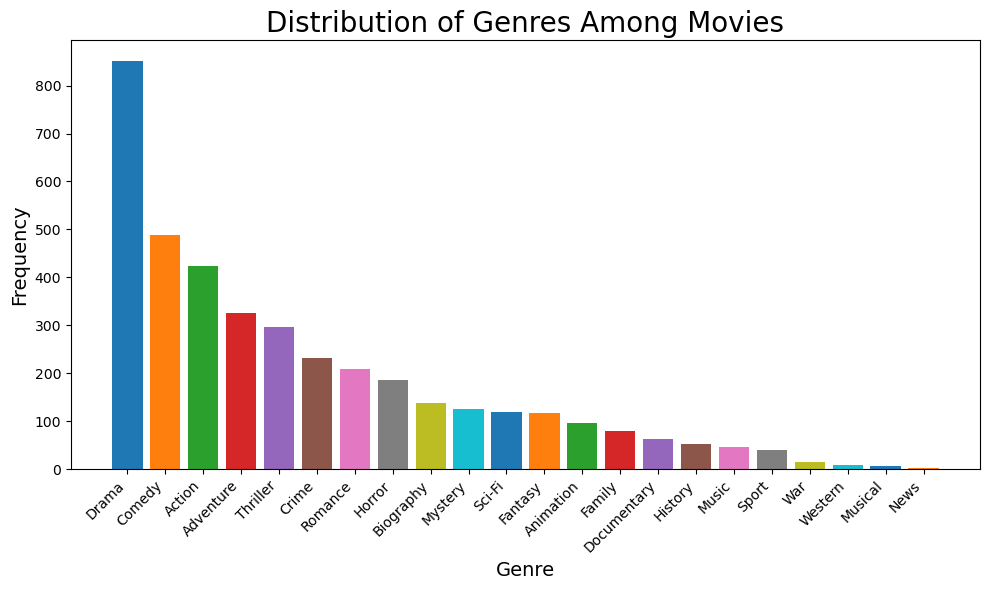

In [60]:
# Plotting abar chart to show the distribution of different genres among the movies.
fig, ax=plt.subplots(figsize=(10, 6))
# Define a color palette
colors = sns.color_palette("tab10")
ax.bar(genre_counts.index, genre_counts, color=colors)
ax.set_xlabel("Genre", fontsize=14) 
ax.set_xticks(range(len(genre_counts.index)))  # Set tick positions
ax.set_xticklabels(genre_counts.index, rotation=45, ha='right')  # Set rotation and alignment of x-axis label
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Genres Among Movies", fontsize=20)
plt.tight_layout()
plt.show();

### 4.2 Runtime Analysis:
Objective question:
What is the distribution of movie runtimes, and how does it impact audience engagemen
We will use a boxplot to answer this.t?

In [61]:
runtime_data = final_dataset['runtime_minutes'].max()
runtime_data

192.0

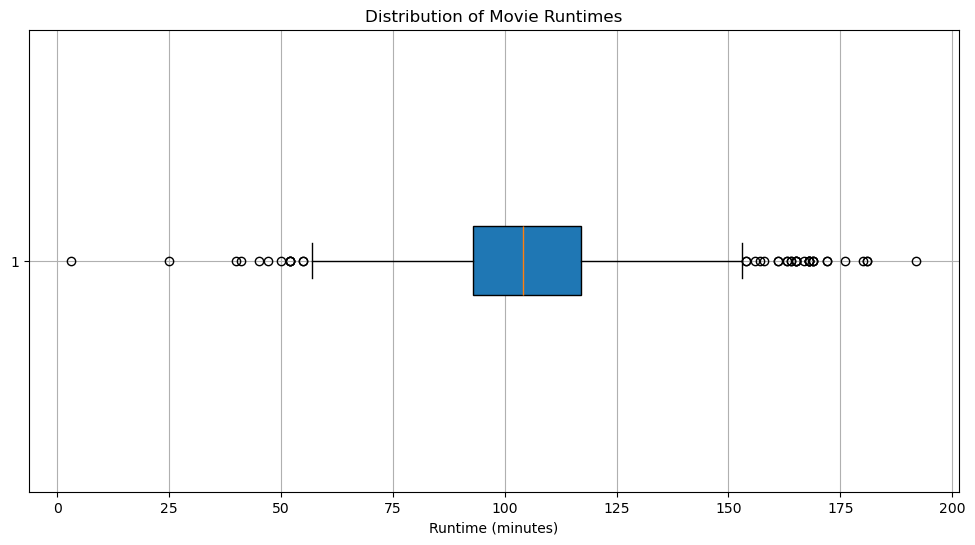

In [62]:
# Prepare the data
runtime_data = final_dataset['runtime_minutes']

# Create a box plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(runtime_data, vert=False, patch_artist=True)

# Customize the plot
ax.set_xlabel('Runtime (minutes)')
ax.set_title('Distribution of Movie Runtimes')
ax.grid(True)

# Show the plot
plt.show()

### 4.3 : Vote Ratings and Popularity vs release month:
Objective Question: What insights can be gained from analyzing the distribution of vote ratings and popularity vs release month among movies, and how can this information inform decision-making for future movie releases?


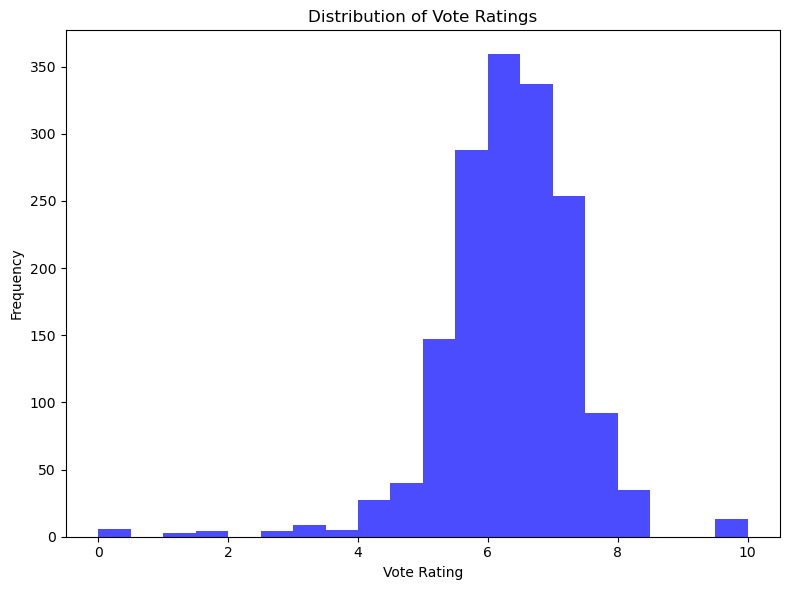

In [63]:
# Prepare the data
vote_ratings = final_dataset['vote_average']

# Create subplots for histograms
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram for vote ratings
ax.hist(vote_ratings, bins=20, color='blue', alpha=0.7)
ax.set_title('Distribution of Vote Ratings')
ax.set_xlabel('Vote Rating')
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();


###### Objective:
Understaning  how movie popularity varies depending on the month of release
In this analysis, we investigated the relationship between movie popularity and the month of release. 
.

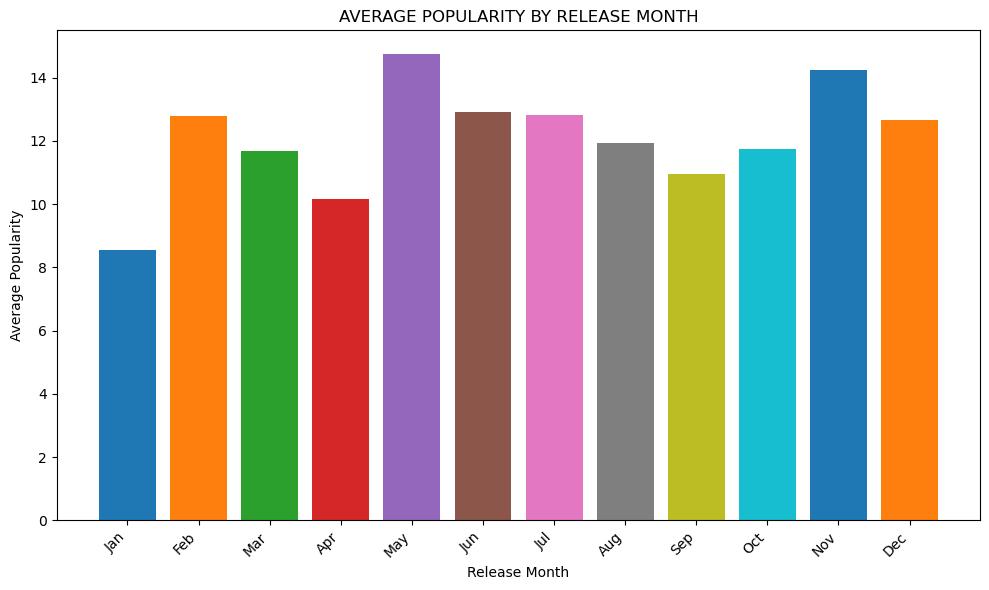

In [64]:
import calendar
# Extract release month
release_month = final_dataset['release_date_x'].dt.month

# Group by release month and calculate average popularity
popularity_by_month = final_dataset.groupby(release_month)['popularity'].mean()
months = popularity_by_month.index
avg_popularity = popularity_by_month.values

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(months, avg_popularity, color=colors)
ax.set_xlabel('Release Month')
ax.set_ylabel('Average Popularity')
ax.set_title('AVERAGE POPULARITY BY RELEASE MONTH')

# Set x-axis labels to month names
month_names = [calendar.month_abbr[m] for m in months]
ax.set_xticks(months)
ax.set_xticklabels(month_names, rotation=45, ha='right')

plt.tight_layout()
plt.show();


### 4.4 Revenue Analysis.
#### Corelation between production budget and domestic gross as well as worldwide gross


Objective Question: How does the production budget correlate with the Domestic gross and worldwide gross revenue of movies, and what insights can we derive from this relationship in terms of profitability and budget effectiveness?

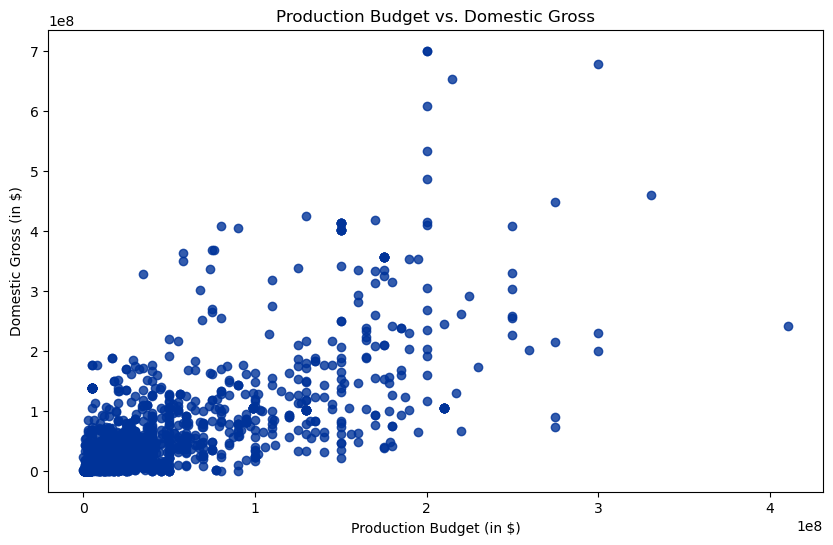

In [65]:
# Prepare the data
Production_Budget = final_dataset['production_budget']
Worldwide_Gross = final_dataset['worldwide_gross']
domestic_gross = final_dataset['domestic_gross_x']

# Plotting production budget vs. domestic gross
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Production_Budget, domestic_gross, color="#003399", alpha=0.8)
ax.set_title('Production Budget vs. Domestic Gross')
ax.set_xlabel('Production Budget (in $)')
ax.set_ylabel('Domestic Gross (in $)')
plt.show();


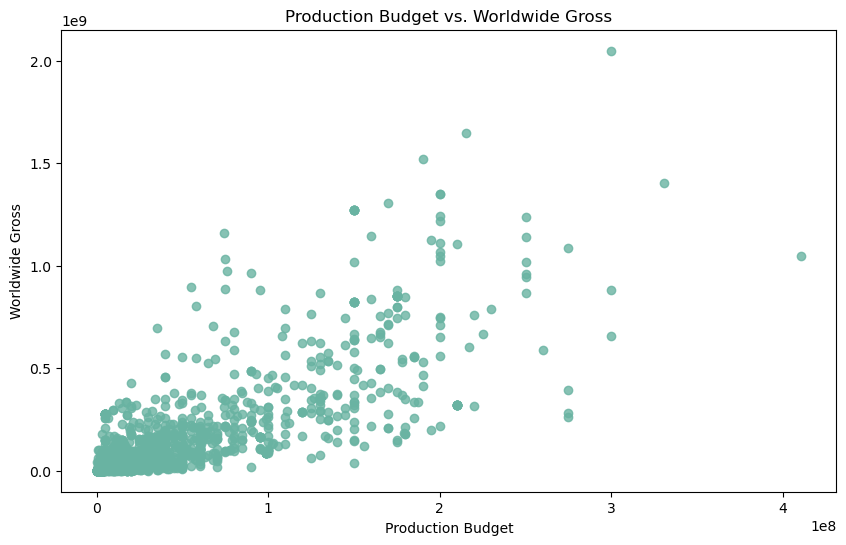

In [66]:
# Creating a scatter plot, plotting Production budget vs Worldwide gross
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Production_Budget, Worldwide_Gross, color="#69b3a2", alpha=0.8)

# Set labels and title
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Production Budget vs. Worldwide Gross')

# Show plot
plt.show();


## **5. CONCLUSION**

As Microsoft's new studios embark on their journey into the film industry, data-driven insights from exploratory analysis provide valuable guidance for strategic decision-making. Here are my key takeaways:

1. **Genre Analysis:** Drama emerges as the most prevalent genre, followed by Comedy and Action. This insight suggests a strong demand for narrative-driven content, with potential opportunities to explore a variety of genres to cater to diverse audience preferences.

2. **Runtime Analysis:** The boxplot analysis reveals a concentration of movie runtimes between 150 and 175 minutes. Understanding audience expectations and preferences regarding movie length can inform content creation strategies and enhance viewer engagement.

3. **Vote Ratings Distribution:** Movies with average vote ratings between 6 and 7 received the highest frequency of votes, indicating a preference for moderately rated films among audiences. This insight underscores the importance of delivering quality content that resonates with viewers.

4. **Average Popularity by Release Month:** May and November emerge as the months associated with the highest average popularity scores for movie releases. Leveraging seasonal trends and release timing can optimize audience engagement and maximize the impact of movie launches.

5. **Correlation Analysis:** Positive correlations between production budget and both domestic gross and worldwide gross highlight the importance of strategic financial investment in movie production. By allocating resources effectively and optimizing budget allocations, Microsoft's studios can enhance the potential for financial success and profitability.


## **6. RECOMMENDATIONS.**

1. **Diversify Genre Portfolio:** While Drama remains a dominant genre, explore opportunities to diversify the genre portfolio to appeal to broader audience segments. Experiment with genres such as Comedy, Action, and Adventure while keeping an eye on emerging trends and audience preferences.

2. **Optimize Runtime:** Maintain a balance between movie runtime and audience preferences. Consider the optimal duration for storytelling while ensuring that content remains engaging and immersive. Explore opportunities to experiment with runtime lengths to gauge audience response and adapt accordingly.

3. **Focus on Quality:** Prioritize quality content creation to drive positive audience sentiment and engagement. Invest in storytelling, character development, and production value to elevate the overall viewing experience and differentiate from competitors.

4. **Strategic Release Planning:** Leverage insights on release month popularity to strategically plan movie releases. Align content launches with peak audience engagement periods to maximize visibility, buzz, and box office performance.

5. **Financial Strategy:** Continuously evaluate the return on investment (ROI) of movie productions to inform budget allocation decisions. Balance financial resources between high-budget projects and potential blockbuster opportunities to mitigate risks and optimize profitability.

By implementing these recommendations and leveraging data-driven insights, Microsoft's new studios can navigate the complexities of the film industry landscape with confidence, creativity, and strategic foresight.